In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [4]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682830 entries, 0 to 1682829
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1682830 non-null  int64  
 1   kWh       1682830 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 25.7 MB


In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1682825    0.14
1682826    0.17
1682827    0.17
1682828    0.16
1682829    0.17
Name: kWh, Length: 1682830, dtype: float64

In [6]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1682825    0.14
1682826    0.17
1682827    0.17
1682828    0.16
1682829    0.17
Name: kWh, Length: 1682830, dtype: float64

In [7]:
l=len(conso_data)-1
l

1682829

In [8]:
conso_data['sec']=conso_data['Interval']/1000


In [9]:
conso_data['Wh']=3600000/conso_data['Interval']


In [10]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [11]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682830 entries, 0 to 1682829
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1682830 non-null  int64  
 1   kWh        1682830 non-null  float64
 2   sec        1682830 non-null  float64
 3   Wh         1682830 non-null  float64
 4   cumul(ms)  1682830 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 64.2 MB


In [12]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1682825,25310,0.14,25.310,142.236270,41536488081
1682826,21309,0.17,21.309,168.942700,41536509390
1682827,20793,0.17,20.793,173.135190,41536530183
1682828,22482,0.16,22.482,160.128102,41536552665
1682829,21391,0.17,21.391,168.295077,41536574056


In [13]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

41536574056000

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 42, 19, 526536)

In [15]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [16]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [17]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [18]:
conso_data['dates']

0         2023-08-21 19:42:41.460536
1         2023-08-21 19:43:03.318536
2         2023-08-21 19:43:25.319536
3         2023-08-21 19:43:47.247536
4         2023-08-21 19:44:09.138536
                     ...            
1682825   2024-12-14 13:37:07.607536
1682826   2024-12-14 13:37:28.916536
1682827   2024-12-14 13:37:49.709536
1682828   2024-12-14 13:38:12.191536
1682829   2024-12-14 13:38:33.582536
Name: dates, Length: 1682830, dtype: datetime64[ns]

## créer les dates

In [19]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:42:41.460536,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:43:03.318536,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:43:25.319536,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:43:47.247536,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:44:09.138536,21/08/23
...,...,...,...,...,...,...,...
1682825,25310,0.14,25.310,142.236270,41536488081,2024-12-14 13:37:07.607536,14/12/24
1682826,21309,0.17,21.309,168.942700,41536509390,2024-12-14 13:37:28.916536,14/12/24
1682827,20793,0.17,20.793,173.135190,41536530183,2024-12-14 13:37:49.709536,14/12/24
1682828,22482,0.16,22.482,160.128102,41536552665,2024-12-14 13:38:12.191536,14/12/24


### save conso_data with dates

In [20]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [21]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('14/12/24', 14, 12, 2024)

In [22]:
here = now.strftime('%H:%M:%S')
here

'13:39:03'

In [23]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [24]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 1680600 to 1682829
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2230 non-null   int64         
 1   kWh        2230 non-null   float64       
 2   sec        2230 non-null   float64       
 3   Wh         2230 non-null   float64       
 4   cumul(ms)  2230 non-null   int64         
 5   dates      2230 non-null   datetime64[ns]
 6   days       2230 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 139.4+ KB


In [25]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [26]:
data = list(df_grp['kWh'])
print(data)

[0.752, 3.697, 4.234, 3.687, 4.145, 4.577, 3.575, 3.426, 3.524, 3.692, 3.684, 3.875, 4.259, 3.73, 3.537, 3.64, 3.323, 3.374, 4.252, 4.003, 4.041, 3.955, 3.461, 4.404, 3.795, 3.757, 4.237, 4.731, 3.892, 3.217, 3.177, 3.965, 3.708, 3.141, 3.764, 4.162, 3.749, 3.604, 4.723, 4.229, 4.508, 3.794, 3.434, 4.304, 3.866, 3.834, 3.464, 4.075, 3.664, 3.399, 4.168, 3.364, 3.871, 3.843, 3.635, 3.753, 4.262, 3.292, 3.883, 3.014, 2.057, 2.047, 2.411, 4.084, 3.704, 4.329, 3.609, 3.94, 3.753, 3.854, 4.052, 4.089, 3.675, 3.146, 3.799, 3.522, 3.62, 3.664, 3.678, 3.296, 3.854, 3.255, 3.752, 3.65, 4.074, 3.564, 3.404, 3.801, 4.063, 4.335, 3.936, 4.19, 4.243, 3.755, 3.921, 3.851, 3.913, 3.719, 4.074, 4.342, 3.891, 3.498, 3.682, 3.675, 3.346, 3.845, 3.996, 4.101, 3.495, 4.168, 3.591, 4.012, 4.599, 3.652, 3.477, 3.57, 4.107, 3.742, 4.084, 3.997, 3.746, 3.591, 5.116, 3.715, 3.763, 4.249, 4.137, 4.631, 4.435, 4.032, 3.713, 4.328, 4.733, 4.183, 4.8, 4.327, 3.694, 4.204, 3.705, 3.696, 3.531, 3.914, 3.692, 3.778, 

In [27]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [28]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [29]:
df = conso_data
len(df)

1682830

In [30]:
period(p=2)

2023-08-22 01:48:55.263536	2023-08-22 08:53:10.883536	7h 4m 15s 	2000


In [31]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.294497
dtype: float64

In [32]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.491349
dtype: float64

In [33]:
last=df_grp.iloc[-1]['kWh']
last

2.23

In [34]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 1680600 to 1682829
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2230 non-null   int64         
 1   kWh        2230 non-null   float64       
 2   sec        2230 non-null   float64       
 3   Wh         2230 non-null   float64       
 4   cumul(ms)  2230 non-null   int64         
 5   dates      2230 non-null   datetime64[ns]
 6   days       2230 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 139.4+ KB


In [35]:
# select day
day = today
#day = '16/08/24'


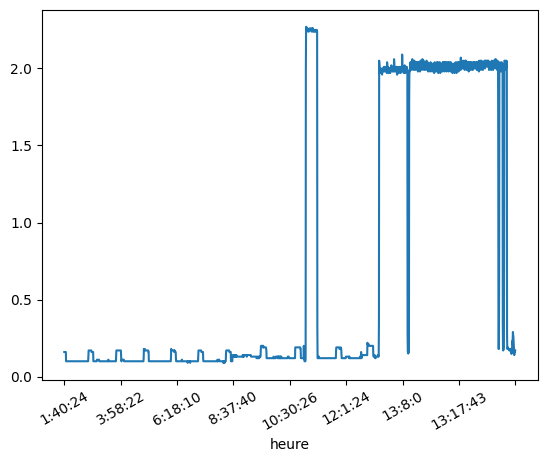

In [36]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [37]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:42:41.460536,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:43:03.318536,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:43:25.319536,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:43:47.247536,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:44:09.138536,21/08/23
...,...,...,...,...,...,...,...
1682825,25310,0.14,25.310,142.236270,41536488081,2024-12-14 13:37:07.607536,14/12/24
1682826,21309,0.17,21.309,168.942700,41536509390,2024-12-14 13:37:28.916536,14/12/24
1682827,20793,0.17,20.793,173.135190,41536530183,2024-12-14 13:37:49.709536,14/12/24
1682828,22482,0.16,22.482,160.128102,41536552665,2024-12-14 13:38:12.191536,14/12/24


In [38]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:13,26081,0.14,26.081,138.031517,41487473610,2024-12-14 00:00:13.136536,14/12/24
0:0:38,25092,0.14,25.092,143.472023,41487498702,2024-12-14 00:00:38.228536,14/12/24
0:1:2,24093,0.15,24.093,149.420994,41487522795,2024-12-14 00:01:02.321536,14/12/24
0:1:26,24160,0.15,24.160,149.006623,41487546955,2024-12-14 00:01:26.481536,14/12/24
0:1:51,24656,0.15,24.656,146.009085,41487571611,2024-12-14 00:01:51.137536,14/12/24
...,...,...,...,...,...,...,...
13:37:7,25310,0.14,25.310,142.236270,41536488081,2024-12-14 13:37:07.607536,14/12/24
13:37:28,21309,0.17,21.309,168.942700,41536509390,2024-12-14 13:37:28.916536,14/12/24
13:37:49,20793,0.17,20.793,173.135190,41536530183,2024-12-14 13:37:49.709536,14/12/24


In [39]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.549
Min : 03/12/24 3.123


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1680600,26081,0.14,26.081,138.031517,41487473610,2024-12-14 00:00:13.136536,14/12/24,0:0:13
1680601,25092,0.14,25.092,143.472023,41487498702,2024-12-14 00:00:38.228536,14/12/24,0:0:38
1680602,24093,0.15,24.093,149.420994,41487522795,2024-12-14 00:01:02.321536,14/12/24,0:1:2
1680603,24160,0.15,24.160,149.006623,41487546955,2024-12-14 00:01:26.481536,14/12/24,0:1:26
1680604,24656,0.15,24.656,146.009085,41487571611,2024-12-14 00:01:51.137536,14/12/24,0:1:51
...,...,...,...,...,...,...,...,...
1682825,25310,0.14,25.310,142.236270,41536488081,2024-12-14 13:37:07.607536,14/12/24,13:37:7
1682826,21309,0.17,21.309,168.942700,41536509390,2024-12-14 13:37:28.916536,14/12/24,13:37:28
1682827,20793,0.17,20.793,173.135190,41536530183,2024-12-14 13:37:49.709536,14/12/24,13:37:49
1682828,22482,0.16,22.482,160.128102,41536552665,2024-12-14 13:38:12.191536,14/12/24,13:38:12


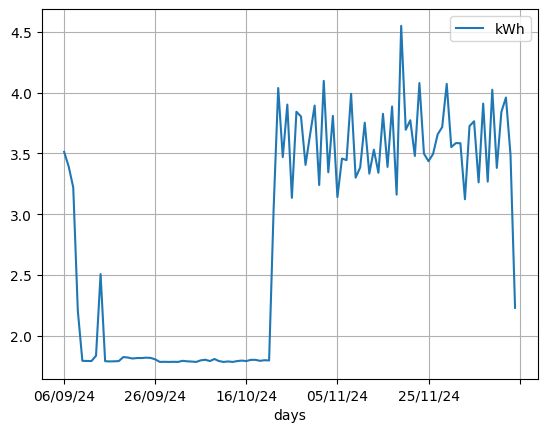

In [40]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-12-14 00:00:13.136536	2024-12-14 08:46:10.829536	8h 45m 57s 	1000
2024-12-14 08:46:10.829536	2024-12-14 13:18:16.737536	4h 32m 5s 	2000
2024-12-14 13:18:16.737536	2024-12-14 13:38:33.582536	0h 20m 16s 	230
<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 1680600 to 1682829
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2230 non-null   int64         
 1   kWh        2230 non-null   float64       
 2   sec        2230 non-null   float64       
 3   Wh         2230 non-null   float64       
 4   cumul(ms)  2230 non-null   int64         
 5   dates      2230 non-null   datetime64[ns]
 6   days       2230 non-null   object        
 7   heure      2230 non-null   object        
 8   hours      2230 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 174.2+ KB


('14/12/24', <Axes: xlabel='hours'>)

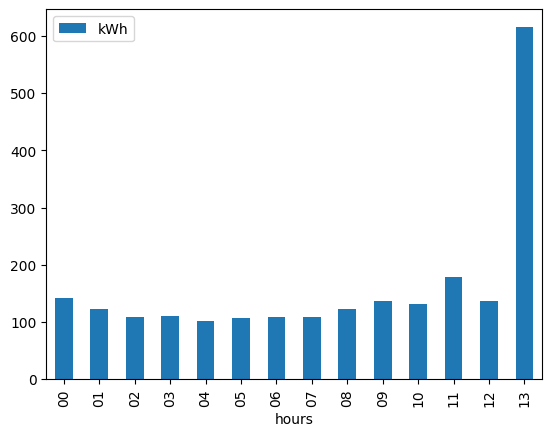

In [41]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [42]:
df_grp

,kWh
days,
21/08/23,0.752
22/08/23,3.697
23/08/23,4.234
24/08/23,3.687
25/08/23,4.145
...,...
10/12/24,3.381
11/12/24,3.842
12/12/24,3.960


In [43]:
# select number of days to display
span = 30
#df_grp.tail(span)


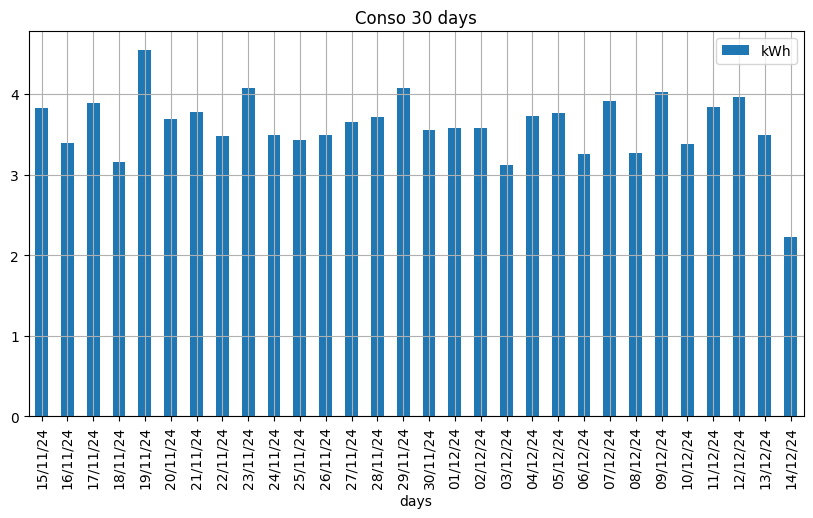

In [44]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


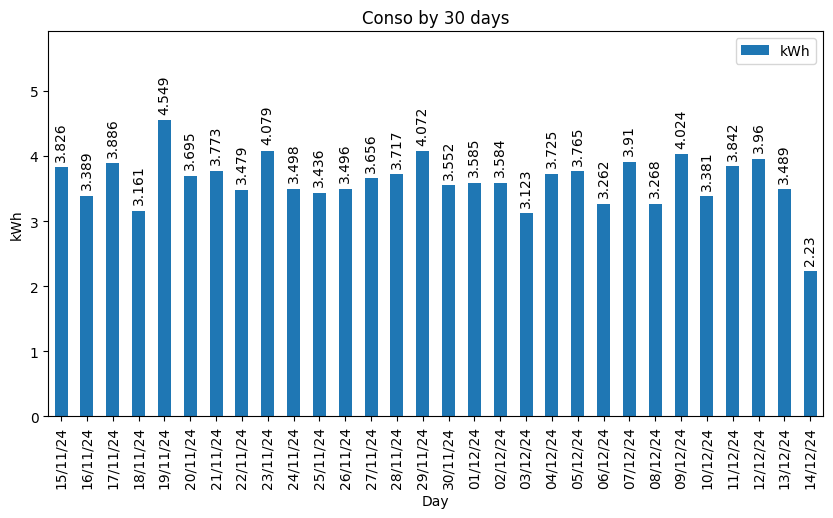

In [45]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [46]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
15/11/24    3.826
16/11/24    3.389
17/11/24    3.886
18/11/24    3.161
19/11/24    4.549
20/11/24    3.695
21/11/24    3.773
22/11/24    3.479
23/11/24    4.079
24/11/24    3.498
25/11/24    3.436
26/11/24    3.496
27/11/24    3.656
28/11/24    3.717
29/11/24    4.072
30/11/24    3.552
01/12/24    3.585
02/12/24    3.584
03/12/24    3.123
04/12/24    3.725
05/12/24    3.765
06/12/24    3.262
07/12/24    3.910
08/12/24    3.268
09/12/24    4.024
10/12/24    3.381
11/12/24    3.842
12/12/24    3.960
13/12/24    3.489
14/12/24    2.230
Name: kWh, dtype: float64

In [47]:
x_labels=df_grp.tail(span).index
x_labels

Index(['15/11/24', '16/11/24', '17/11/24', '18/11/24', '19/11/24', '20/11/24',
       '21/11/24', '22/11/24', '23/11/24', '24/11/24', '25/11/24', '26/11/24',
       '27/11/24', '28/11/24', '29/11/24', '30/11/24', '01/12/24', '02/12/24',
       '03/12/24', '04/12/24', '05/12/24', '06/12/24', '07/12/24', '08/12/24',
       '09/12/24', '10/12/24', '11/12/24', '12/12/24', '13/12/24', '14/12/24'],
      dtype='object', name='days')

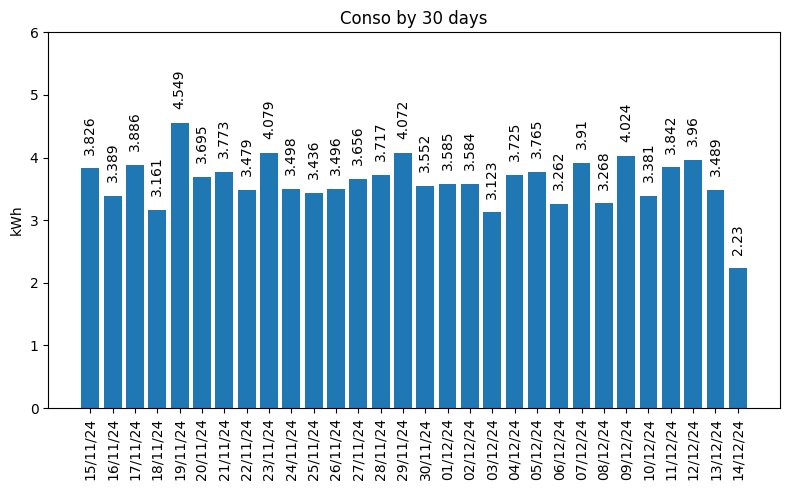

In [48]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [49]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

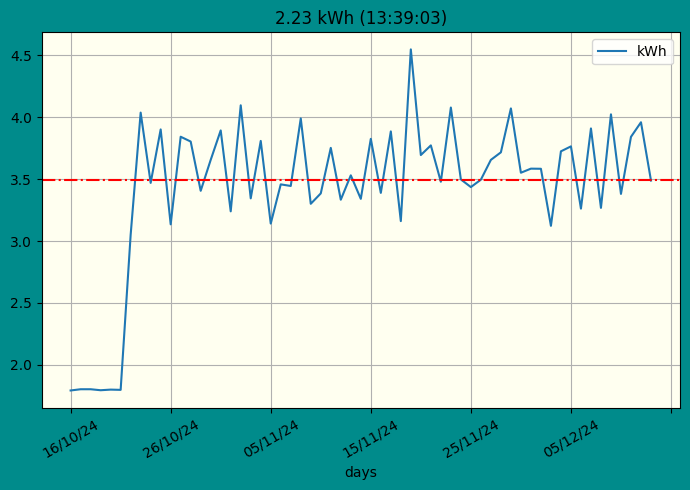

In [50]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

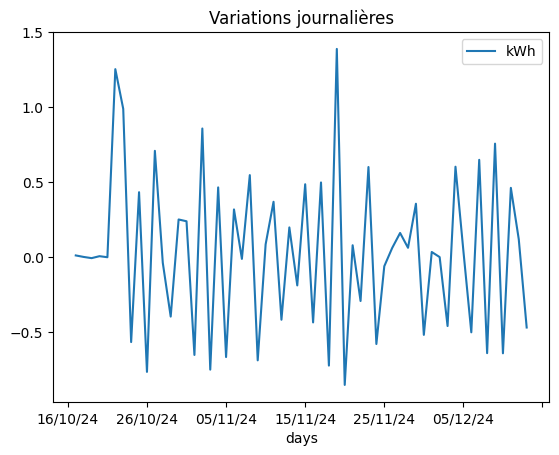

In [51]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [52]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:42:41.460536,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:43:03.318536,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:43:25.319536,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:43:47.247536,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:44:09.138536,21/08/23,19
...,...,...,...,...,...,...,...,...
1682825,25310,0.14,25.310,142.236270,41536488081,2024-12-14 13:37:07.607536,14/12/24,13
1682826,21309,0.17,21.309,168.942700,41536509390,2024-12-14 13:37:28.916536,14/12/24,13
1682827,20793,0.17,20.793,173.135190,41536530183,2024-12-14 13:37:49.709536,14/12/24,13
1682828,22482,0.16,22.482,160.128102,41536552665,2024-12-14 13:38:12.191536,14/12/24,13


In [53]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [54]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [55]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [56]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,752
22/08/23,3697
23/08/23,4234
24/08/23,3687
25/08/23,4145
...,...
10/12/24,3381
11/12/24,3842
12/12/24,3960


In [58]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:42:41.460536,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:43:03.318536,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:43:25.319536,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:43:47.247536,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:44:09.138536,21/08/23,19
...,...,...,...,...,...,...,...,...
1682825,25310,0.14,25.310,142.236270,41536488081,2024-12-14 13:37:07.607536,14/12/24,13
1682826,21309,0.17,21.309,168.942700,41536509390,2024-12-14 13:37:28.916536,14/12/24,13
1682827,20793,0.17,20.793,173.135190,41536530183,2024-12-14 13:37:49.709536,14/12/24,13
1682828,22482,0.16,22.482,160.128102,41536552665,2024-12-14 13:38:12.191536,14/12/24,13


In [59]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
14/12/24 13    1682825  14/12/24    13  0.14
               1682826  14/12/24    13  0.17
               1682827  14/12/24    13  0.17
               1682828  14/12/24    13  0.16
               1682829  14/12/24    13  0.17

[1682830 rows x 3 columns]

In [60]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [61]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [62]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,752,752
22/08/23,3697,3697
23/08/23,4234,4234
24/08/23,3687,3687
25/08/23,4145,4145
...,...,...
10/12/24,3381,3381
11/12/24,3842,3842
12/12/24,3960,3960


In [63]:
grp_by_day['kWh'].cumsum()

days
21/08/23        752
22/08/23       4449
23/08/23       8683
24/08/23      12370
25/08/23      16515
             ...   
10/12/24    1669309
11/12/24    1673151
12/12/24    1677111
13/12/24    1680600
14/12/24    1682830
Name: kWh, Length: 482, dtype: int64

In [64]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19      48
         20     276
         21     165
         22     130
         23     133
...             ...
14/12/24 09     137
         10     132
         11     179
         12     136
         13     616

[11539 rows x 1 columns]

In [65]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19            48
          20           324
          21           489
          22           619
          23           752
                    ...   
14/12/24  09       1681767
          10       1681899
          11       1682078
          12       1682214
          13       1682830
Name: kWh, Length: 11539, dtype: int64

In [66]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19      48      48    NaN
         20     276     324  228.0
         21     165     489 -111.0
         22     130     619  -35.0
         23     133     752    3.0
...             ...     ...    ...
14/12/24 09     137    1167   14.0
         10     132    1299   -5.0
         11     179    1478   47.0
         12     136    1614  -43.0
         13     616    2230  480.0

[11539 rows x 3 columns]

In [67]:
today, grp_by_dayhours.loc[today]

('14/12/24',
        kWh  cumsum   diff
 hours                    
 00     142     142    NaN
 01     123     265  -19.0
 02     109     374  -14.0
 03     110     484    1.0
 04     101     585   -9.0
 05     106     691    5.0
 06     108     799    2.0
 07     108     907    0.0
 08     123    1030   15.0
 09     137    1167   14.0
 10     132    1299   -5.0
 11     179    1478   47.0
 12     136    1614  -43.0
 13     616    2230  480.0)

Text(0.5, 1.0, 'Cumul journalier')

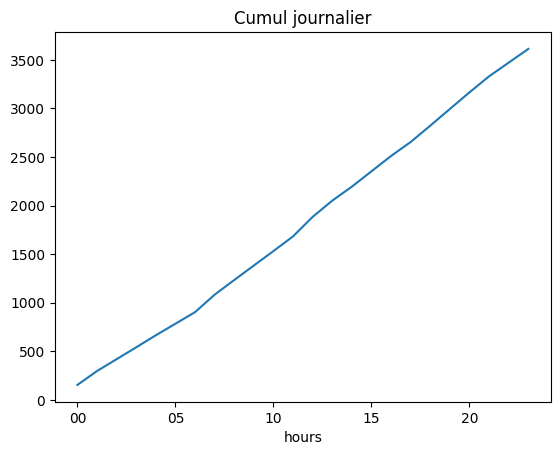

In [68]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

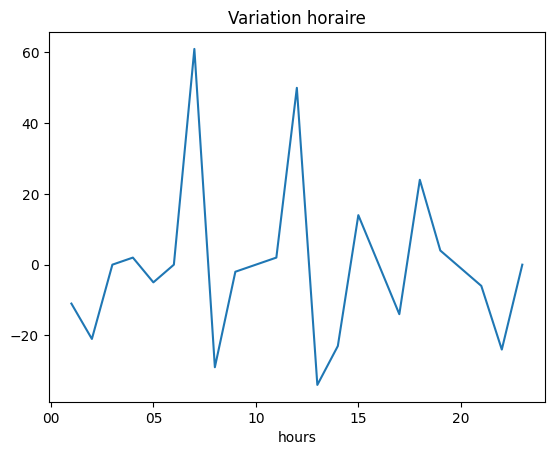

In [69]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [70]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

482

In [71]:
df_grp.tail(n)['kWh'].describe()


count    482.000000
mean       3.491349
std        0.692298
min        0.752000
25%        3.340250
50%        3.624000
75%        3.874000
max        5.116000
Name: kWh, dtype: float64

In [72]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '482 days')

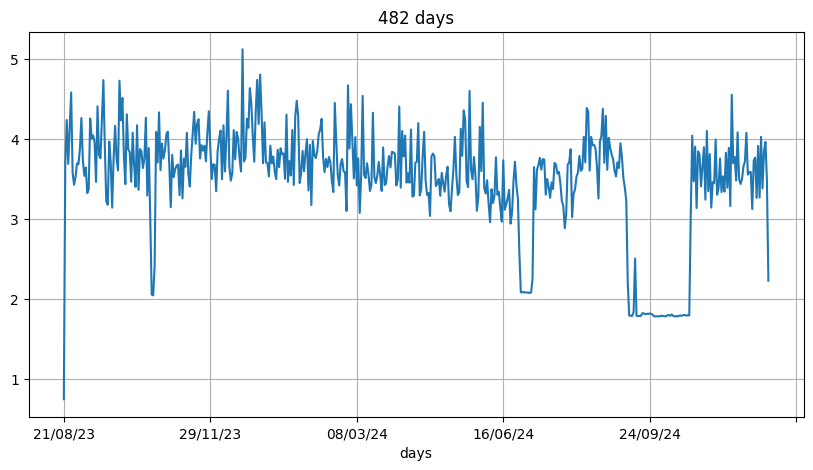

In [73]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

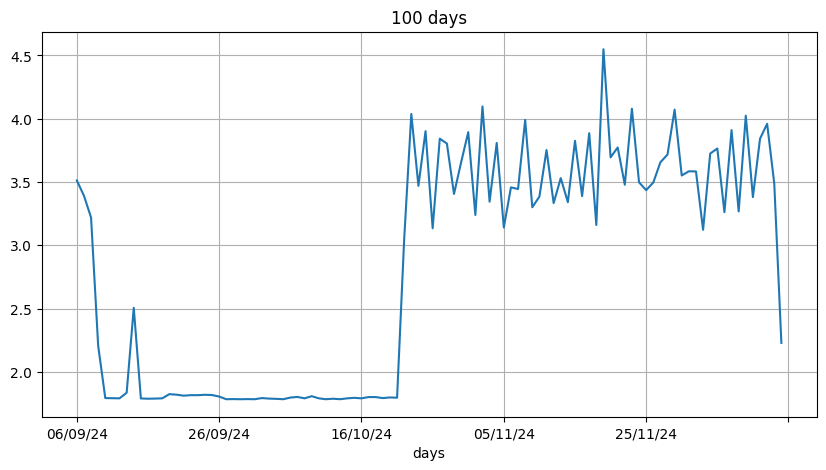

In [74]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [75]:
df_grp['kWh']

days
21/08/23    0.752
22/08/23    3.697
23/08/23    4.234
24/08/23    3.687
25/08/23    4.145
            ...  
10/12/24    3.381
11/12/24    3.842
12/12/24    3.960
13/12/24    3.489
14/12/24    2.230
Name: kWh, Length: 482, dtype: float64

In [76]:
df_grp.describe()

,kWh
count,482.000000
mean,3.491349
std,0.692298
min,0.752000
25%,3.340250
50%,3.624000
75%,3.874000
max,5.116000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

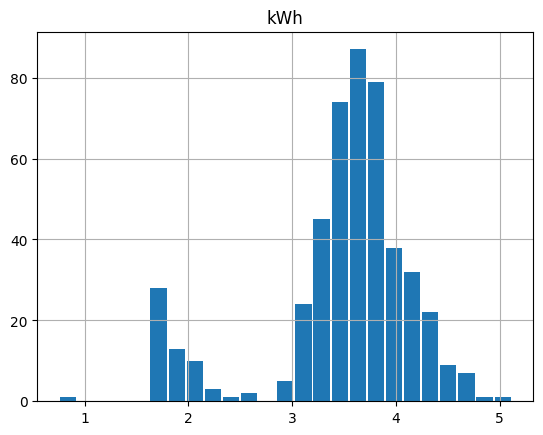

In [77]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [78]:
df_grp.tail(span)['kWh']

days
06/09/24    3.513
07/09/24    3.392
08/09/24    3.220
09/09/24    2.207
10/09/24    1.794
            ...  
10/12/24    3.381
11/12/24    3.842
12/12/24    3.960
13/12/24    3.489
14/12/24    2.230
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [79]:
day

'14/12/24'

In [80]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,142,142,NaN
01,123,265,-19.0
02,109,374,-14.0
03,110,484,1.0
04,101,585,-9.0
05,106,691,5.0
06,108,799,2.0
07,108,907,0.0
08,123,1030,15.0


In [81]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


14

In [82]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 15)

In [83]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [84]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [85]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
Name: days, dtype: float64

In [86]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [87]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 00 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     14 non-null     int64  
 1   cumsum  14 non-null     int64  
 2   diff    13 non-null     float64
 3   days    14 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 560.0+ bytes


In [88]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
Name: days, dtype: float64

In [89]:
day

'14/12/24'

In [90]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,142,142,NaN,1.0
01,123,265,-19.0,2.0
02,109,374,-14.0,3.0
03,110,484,1.0,4.0
04,101,585,-9.0,5.0
05,106,691,5.0,6.0
06,108,799,2.0,7.0
07,108,907,0.0,8.0
08,123,1030,15.0,9.0


Text(0.5, 1.0, '14/12/24')

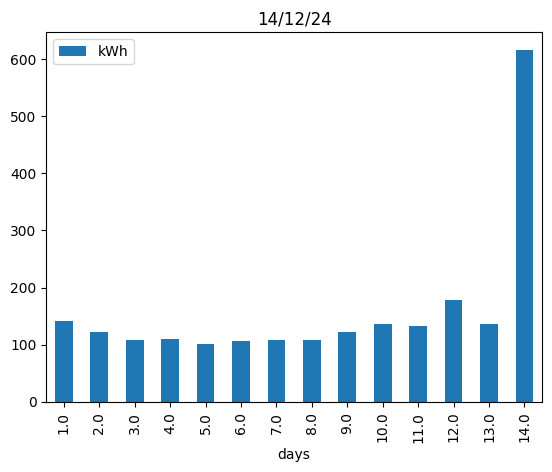

In [91]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [92]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13'],
      dtype='object', name='hours')

# Conso du jour


In [93]:
groupedbyhour.count()

,kWh
hours,
00,142
01,123
02,109
03,110
04,101
05,106
06,108
07,108
08,123


In [94]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    150
01    168
02    168
03    150
04    167
05    143
06    127
07    130
08    114
09    131
10    126
11    118
12    131
13    178
14    157
15    154
16    910
17    217
18    274
19    313
20    295
21    308
22    297
23    190
Name: kWh, dtype: int64

In [95]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

Text(0.5, 1.0, '100 days')

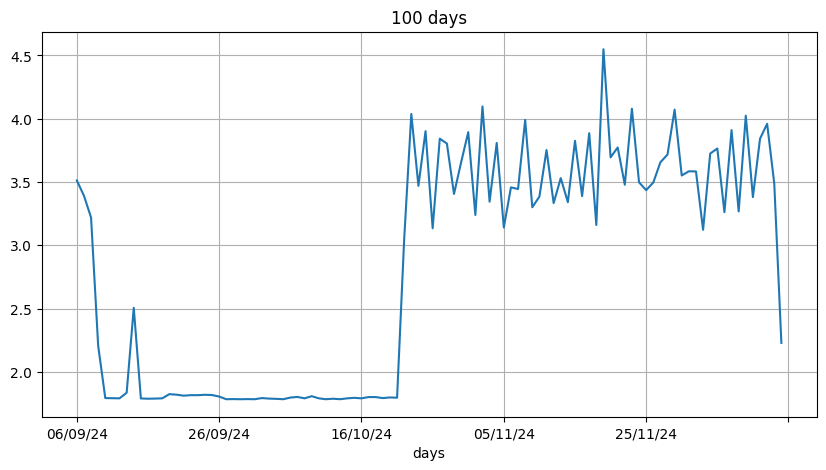

In [96]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [97]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

78.50581932067871


# Today

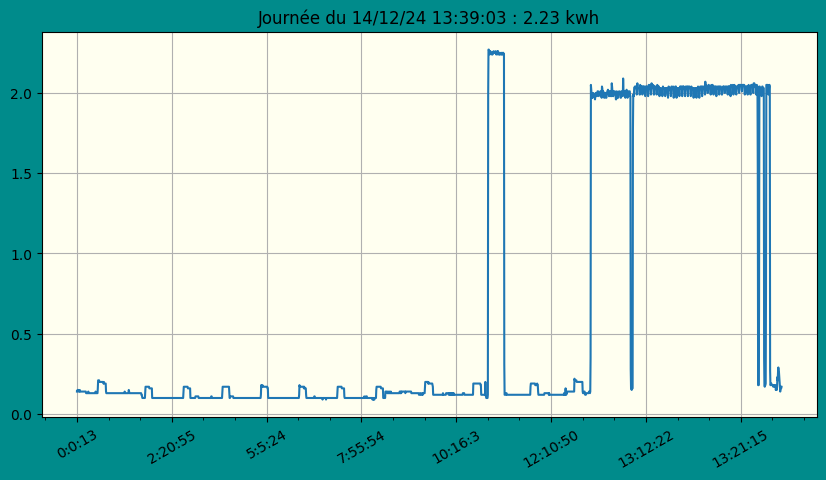

In [98]:
show(today,bgcolor='ivory')

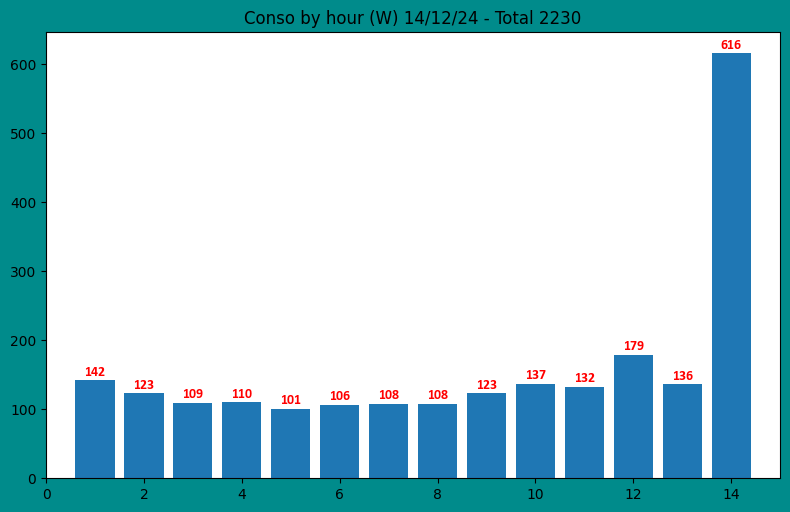

In [99]:
conso_by_hour(today)

In [100]:
day = '21/11/24'

('21/11/24', None)

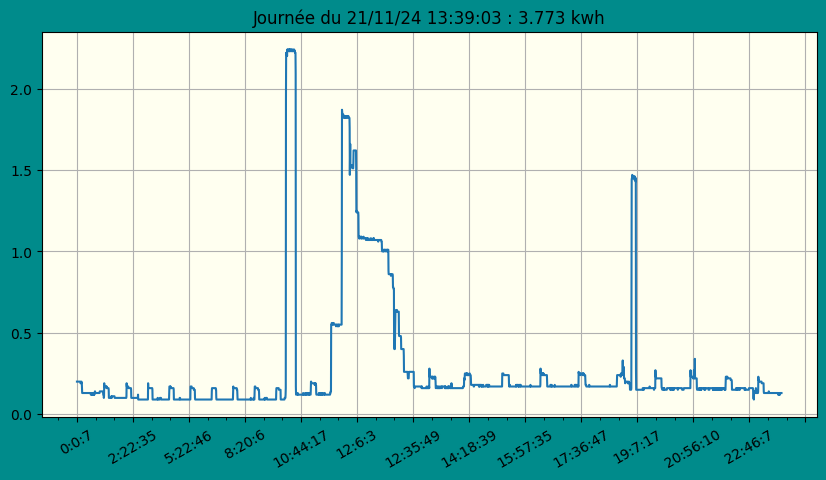

In [101]:
day, show(day,bgcolor='ivory')

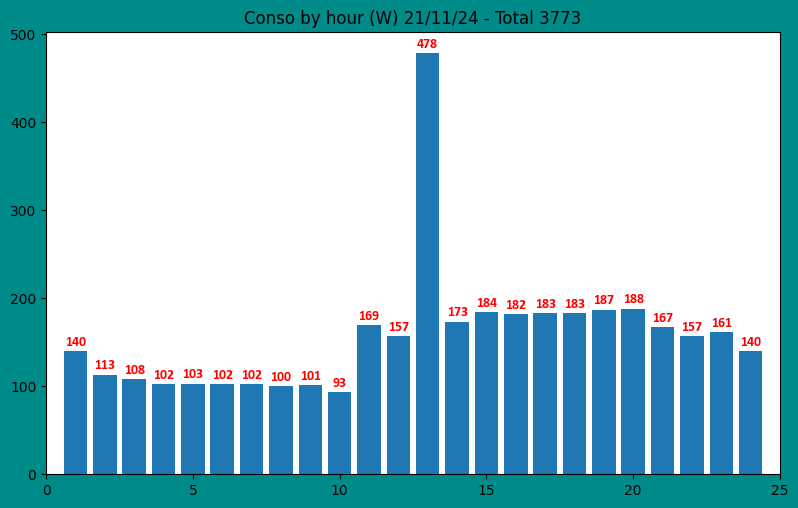

In [102]:
conso_by_hour(day)

('21/12/23', None)

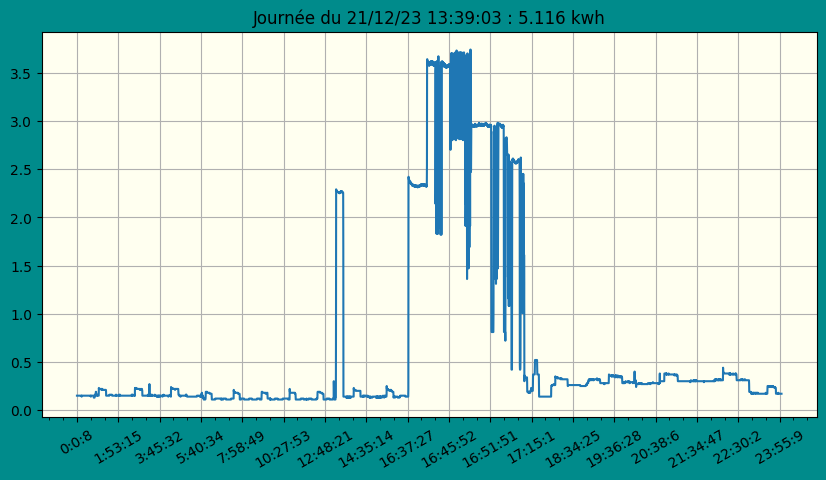

In [103]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

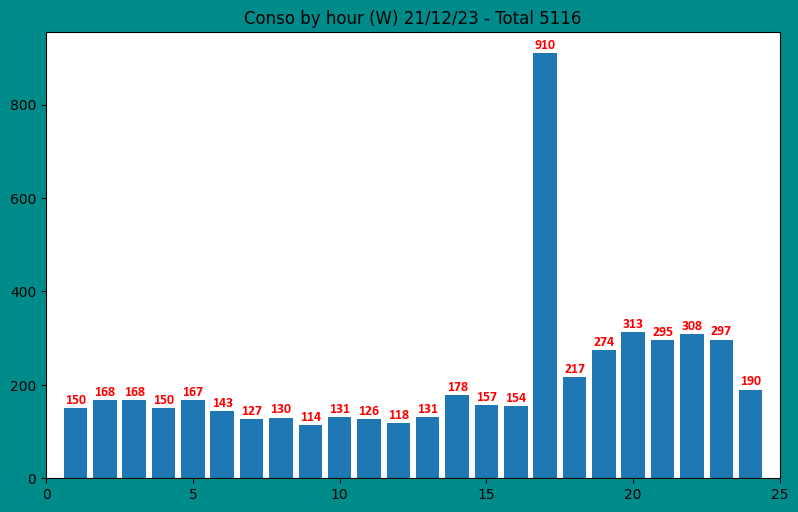

In [104]:
conso_by_hour(day)

In [105]:
sum(data)

5116

In [106]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,142,142,NaN,1.0
01,123,265,-19.0,2.0
02,109,374,-14.0,3.0
03,110,484,1.0,4.0
04,101,585,-9.0,5.0
05,106,691,5.0,6.0
06,108,799,2.0,7.0
07,108,907,0.0,8.0
08,123,1030,15.0,9.0


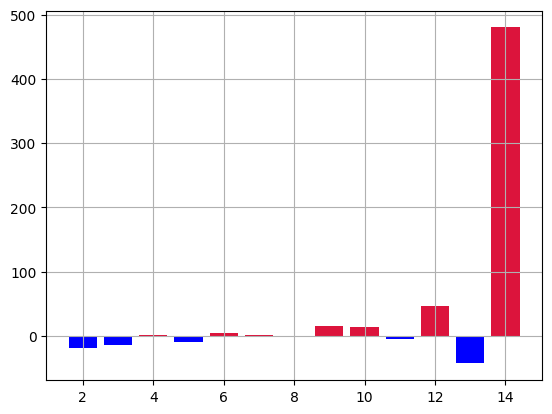

In [107]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [108]:
data

hours
00    150
01    168
02    168
03    150
04    167
05    143
06    127
07    130
08    114
09    131
10    126
11    118
12    131
13    178
14    157
15    154
16    910
17    217
18    274
19    313
20    295
21    308
22    297
23    190
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

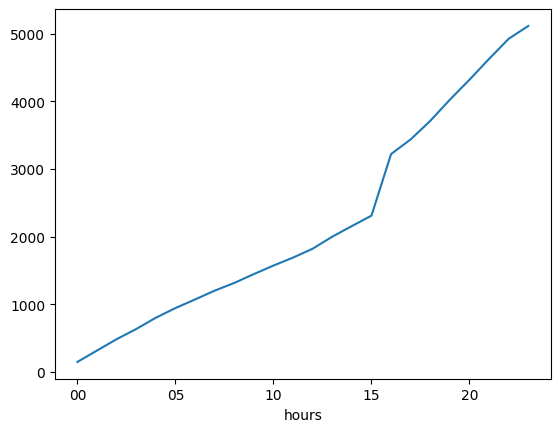

In [109]:
data.cumsum().plot()


<Axes: xlabel='hours'>

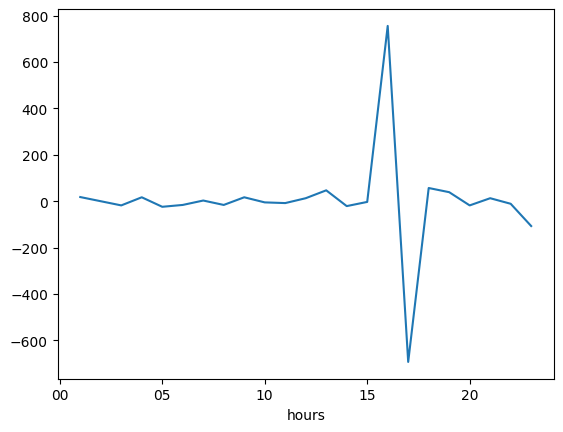

In [110]:
# evolution par heure
data.diff().plot()

In [111]:
data.diff().describe()

count     23.000000
mean       1.739130
std      220.926606
min     -693.000000
25%      -17.000000
50%       -3.000000
75%       17.000000
max      756.000000
Name: kWh, dtype: float64

<Axes: >

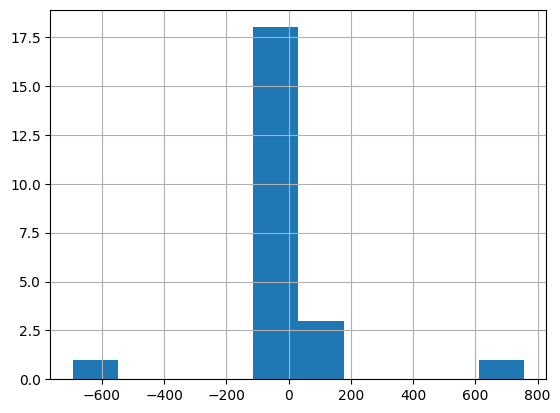

In [112]:
data.diff().hist()

# Test sauvegarde

In [113]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [114]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [115]:
#conso_byhour(day)

In [116]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


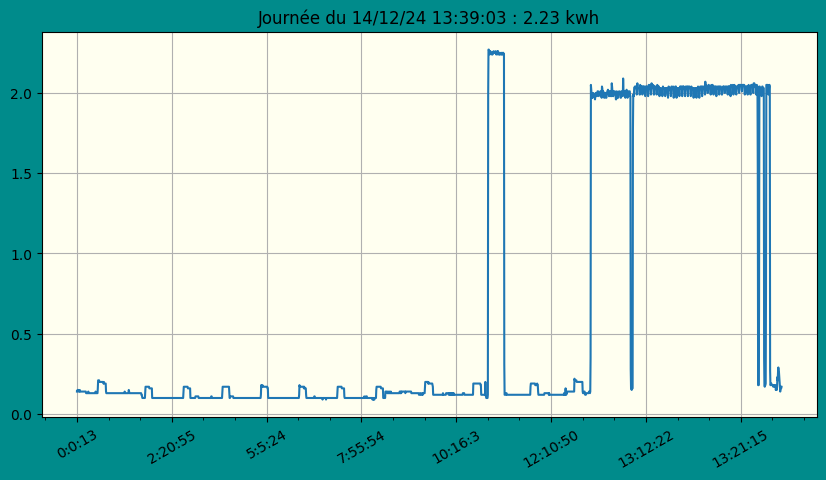

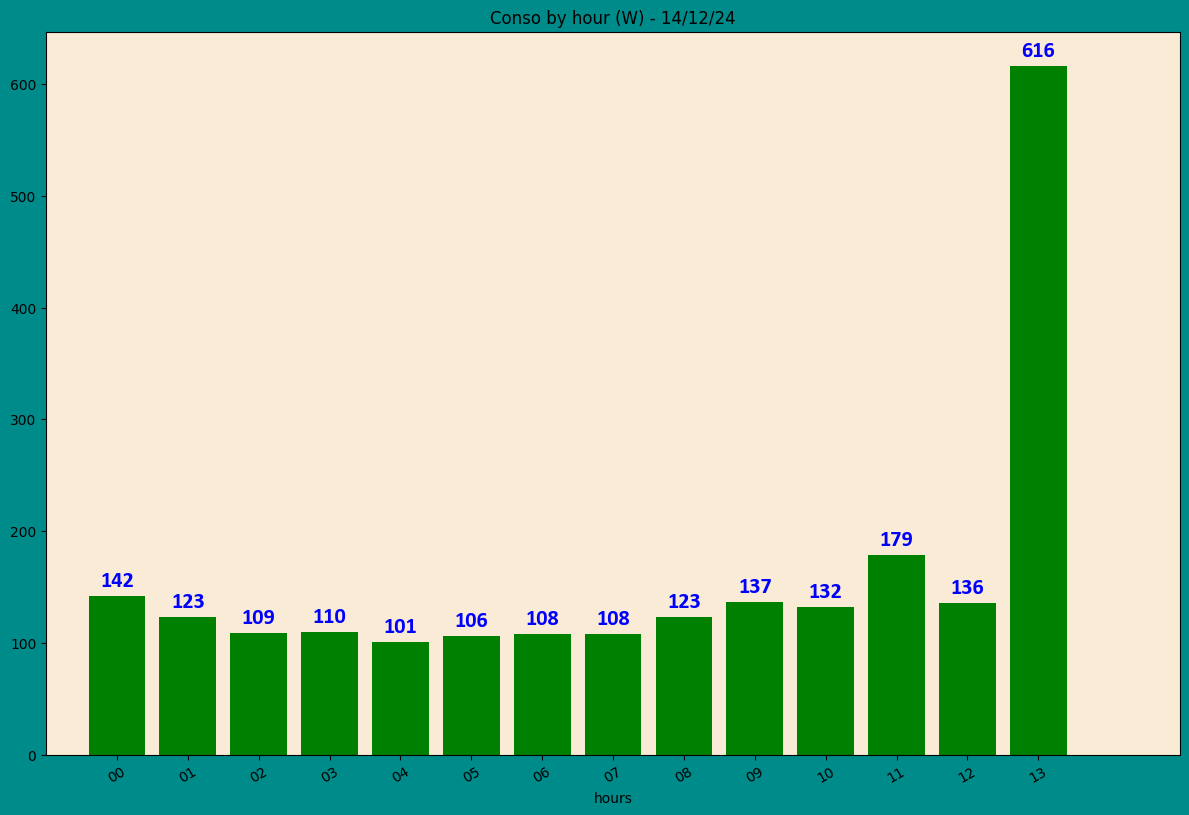

In [117]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [118]:
month.describe()


count    30.000000
mean      3.650767
std       0.313665
min       3.123000
25%       3.446750
50%       3.620500
75%       3.838000
max       4.549000
Name: kWh, dtype: float64

<Axes: >

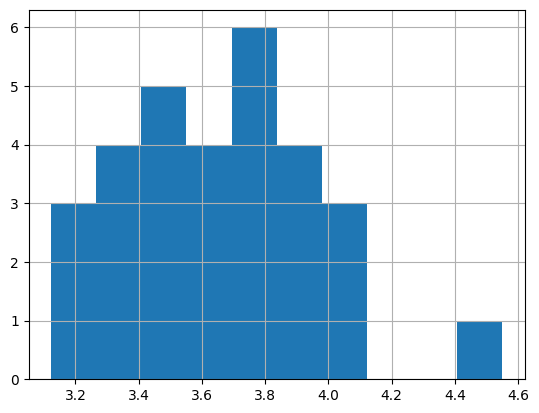

In [119]:
month.hist()

<Axes: xlabel='days'>

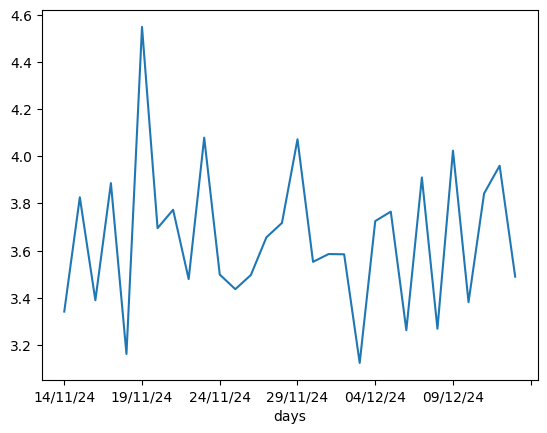

In [120]:
month.plot()

In [121]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [122]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

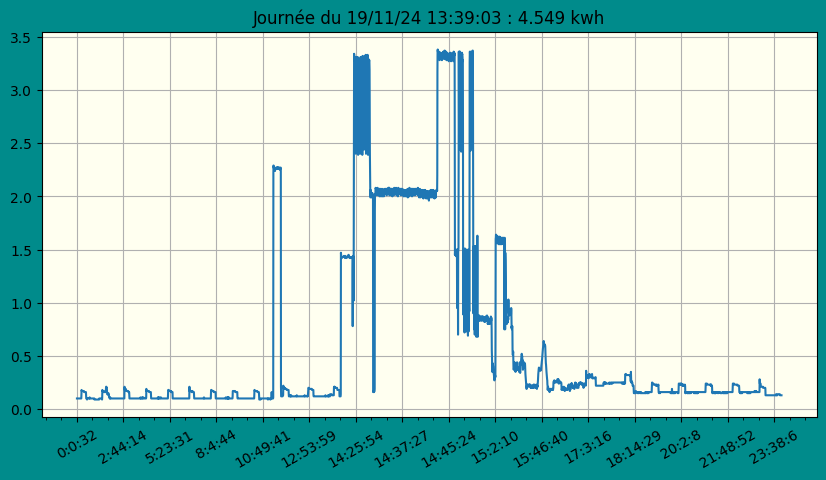

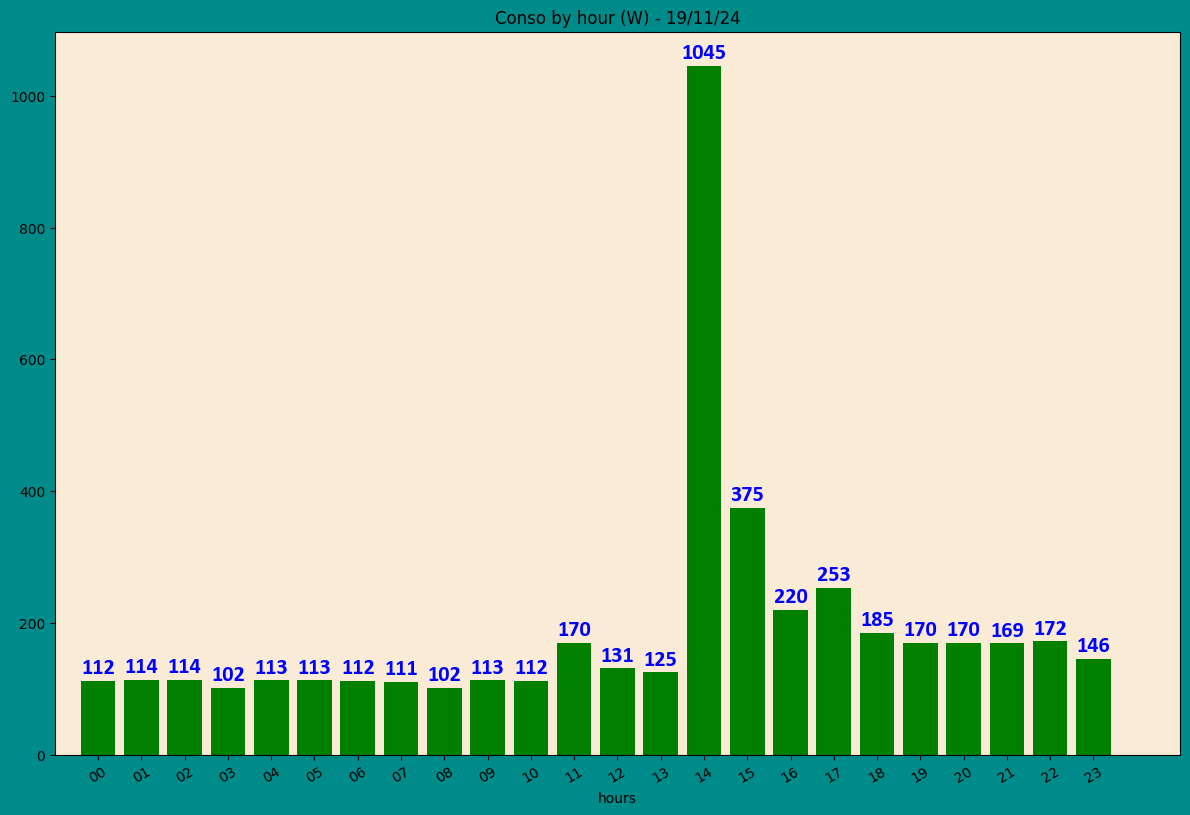

In [123]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [124]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19      48      48    NaN   NaN
         20     276     324  228.0   NaN
         21     165     489 -111.0   NaN
         22     130     619  -35.0   NaN
         23     133     752    3.0   NaN
...             ...     ...    ...   ...
14/12/24 09     137    1167   14.0  10.0
         10     132    1299   -5.0  11.0
         11     179    1478   47.0  12.0
         12     136    1614  -43.0  13.0
         13     616    2230  480.0  14.0

[11539 rows x 4 columns]

In [125]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,112,112,NaN,NaN
01,114,226,2.0,NaN
02,114,340,0.0,NaN
03,102,442,-12.0,NaN
04,113,555,11.0,NaN
05,113,668,0.0,NaN
06,112,780,-1.0,NaN
07,111,891,-1.0,NaN
08,102,993,-9.0,NaN


In [126]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

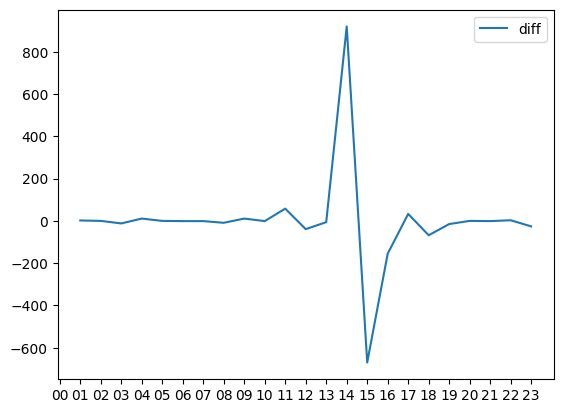

In [127]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

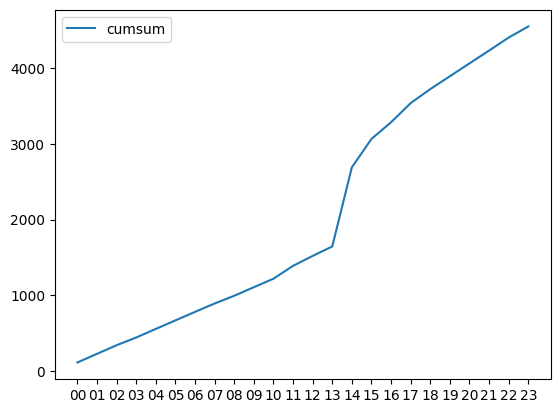

In [128]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [129]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB